In [1]:
## FLORIS v3.6 IMPLEMENTATION

import matplotlib.pyplot as plt
import numpy as np

import floris.tools.visualization as wakeviz
from floris.tools import FlorisInterface

In [2]:
fi = FlorisInterface("Case01_SingleTurbineWake.yaml")

WS = 8.0
RD = 120.0

x_resolution=1501
y_resolution=201
z_resolution=100
x_bounds = [-5*RD, 25*RD]
yaw_angles = np.array([[[0.]]])


horizontal_plane = fi.calculate_horizontal_plane(
    x_resolution=x_resolution,
    y_resolution=y_resolution,
    height=100.0,
    yaw_angles=yaw_angles,
    x_bounds=x_bounds
)

<Axes: title={'center': 'Horizontal'}>

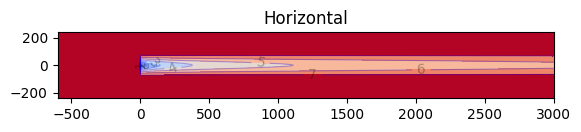

In [3]:
wakeviz.visualize_cut_plane(
    horizontal_plane,
    label_contours=True,
    title="Horizontal"
)

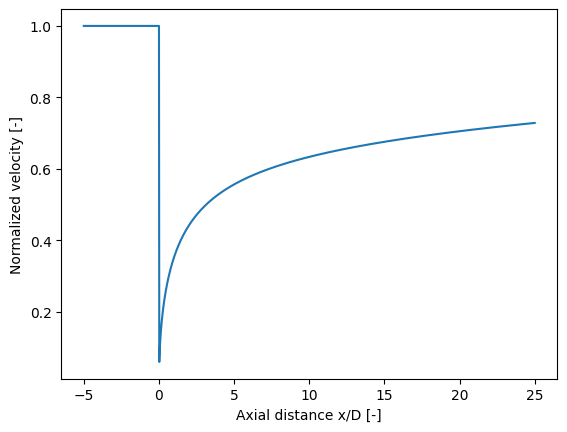

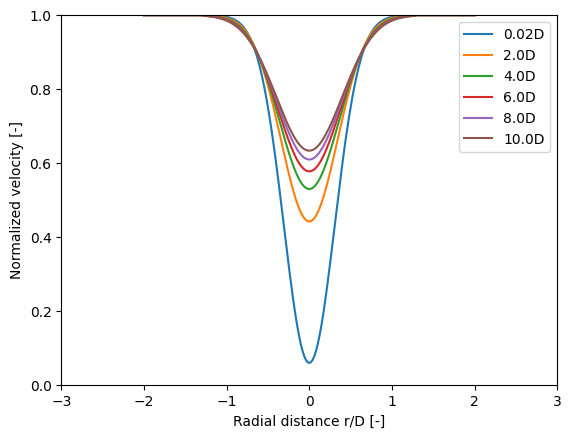

In [5]:
x1 = horizontal_plane.df.x1[:x_resolution]
x11 = horizontal_plane.df.x1[150100:151601] # [x_resolution*int((y_resolution-1)/2) + 0:x_resolution]
x2 = horizontal_plane.df.x2[::x_resolution]
uax = horizontal_plane.df.u[150100:151601]

plt.figure()
plt.plot(x1/RD,uax/WS)
plt.xlabel("Axial distance x/D [-]")
plt.ylabel("Normalized velocity [-]")

plt.figure()
for idx in np.append(251, np.linspace(350,750,5)):  #range(200,1200,200):
    urad = horizontal_plane.df.u[int(idx)::x_resolution]
    plt.plot(x2/RD,urad/WS,label=str((idx-250)/50)+'D')
plt.legend()
plt.xlabel("Radial distance r/D [-]")
plt.ylabel("Normalized velocity [-]")
plt.axis([-3, 3, 0, 1])

wakeviz.show_plots()